In [1]:
import os
import glob
import psycopg2
import pandas as pd
import seaborn as sns
from sql_queries import *
from matplotlib import pyplot as plt

In [2]:
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cur = conn.cursor()

In [3]:
query = """
SELECT songplays.songplay_id, songplays.start_time, hour, day, week, month, year, weekday, 
songplays.user_id, songplays.level, location, user_agent, gender
FROM songplays
JOIN users 
ON songplays.user_id = users.user_id
JOIN time 
ON songplays.start_time = time.start_time
"""

songplays = pd.read_sql(query, conn, index_col='songplay_id')

In [4]:
songplays.head()

,start_time,hour,day,week,month,year,weekday,user_id,level,location,user_agent,gender
songplay_id,,,,,,,,,,,,
1,2018-11-30 00:22:07.796,0,30,48,11,2018,4,91,free,"Dallas-Fort Worth-Arlington, TX",Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,M
2,2018-11-30 01:08:41.796,1,30,48,11,2018,4,73,paid,"Tampa-St. Petersburg-Clearwater, FL","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",M
3,2018-11-30 01:12:48.796,1,30,48,11,2018,4,73,paid,"Tampa-St. Petersburg-Clearwater, FL","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",M
4,2018-11-30 01:17:05.796,1,30,48,11,2018,4,73,paid,"Tampa-St. Petersburg-Clearwater, FL","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",M
5,2018-11-30 01:20:56.796,1,30,48,11,2018,4,73,paid,"Tampa-St. Petersburg-Clearwater, FL","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",M


In [5]:
songplays['state'] = songplays['location'].apply(lambda x: x.split(', ')[-1])

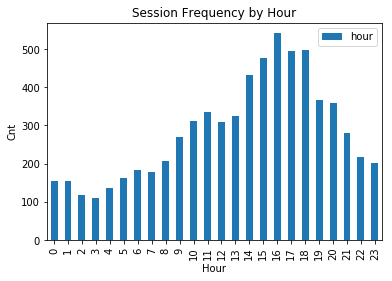

In [6]:
fig, ax = plt.subplots()

(songplays['hour']
 .value_counts()
 .reset_index()
 .sort_values(by='index')
 .set_index('index')
 .plot(ax=ax, kind='bar'))

ax.set(xlabel='Hour', ylabel='Cnt', title='Session Frequency by Hour')
plt.show()

fig.savefig("images/session_frequency_by_hour.png")

In [7]:
day_of_week_dict={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

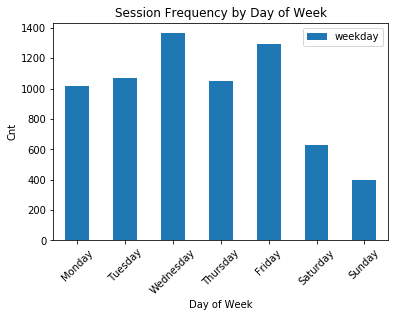

In [12]:
fig, ax = plt.subplots()

aa = (songplays['weekday']
 .value_counts()
 .reset_index()
 .sort_values(by='index')
)
aa['index'] = aa['index'].map(day_of_week_dict)
aa = aa.set_index('index')
aa.plot(ax=ax, kind='bar')

ax.set(xlabel='Day of Week', ylabel='Cnt', title='Session Frequency by Day of Week')
plt.xticks(rotation=45)
plt.show()

fig.savefig("images/session_frequency_by_weekday.png", bbox_inches='tight')

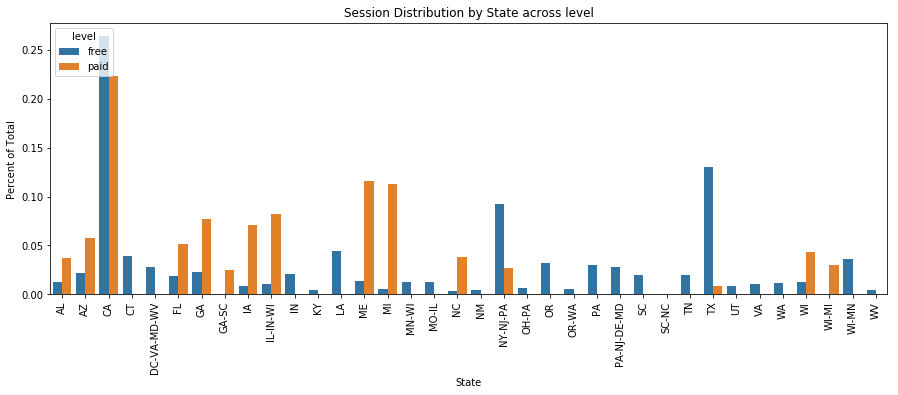

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))

aa = songplays.groupby(by=['state', 'level'])['user_id'].count().reset_index()
aa['perc_of_total']=  aa['user_id']/aa.groupby('level')['user_id'].transform('sum')

sns.barplot(data=aa, x='state', y='perc_of_total', hue='level')

ax.set(xlabel='State', ylabel='Percent of Total', title='Session Distribution by State across level')
plt.xticks(rotation=90)

plt.show()

fig.savefig("images/session_frequency_by_state_level.png")

In [10]:
conn.close()